170500096/170498071 [==============================] - 3s 0us/step
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


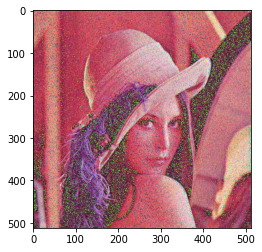

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.layers import GaussianNoise,Conv2D,BatchNormalization,Input,Dense,Add,ReLU
from tensorflow.keras.models import Model
import numpy as np
from google.colab import drive
import PIL
from IPython.display import Image
import matplotlib.pyplot as plt

#dataset load
(x_train,_),(x_test,_) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0
y_train, y_test =x_train,x_test

#google drive mount
drive.mount('/content/gdrive')

#modeling
input_layer = Input(shape=(None, None, 3))
nin=GaussianNoise(0.1)(input_layer)
model=Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(nin)
model=Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(model)
model=Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(model)
model=Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(model)
model=Conv2D(filters=3,kernel_size=(3,3),padding='same')(model)
nout=Add()([nin,model])
model_2 = tf.keras.models.Model(inputs = input_layer , outputs = nout )

#training 
model_2.compile(optimizer='Adam',loss='MeanSquaredError',metrics=['accuracy'])
model_2.fit(x=x_train, y=y_train, batch_size=32, epochs=100)

#load test data
noise_image = np.asarray(PIL.Image.open('/content/gdrive/My Drive/Colab Notebooks/noisy(1).png'))
noise_image=noise_image/255.0
noise_image=np.array([noise_image])

#inference
predictions=model_2.predict(noise_image)

#print inferenced picture
predict_image = predictions[0]*255.0
im = PIL.Image.fromarray(predict_image.astype('uint8'),'RGB')
im.save('/content/gdrive/My Drive/Colab Notebooks/Model2.png')
plt.imshow(im)
plt.show()